<a href="https://colab.research.google.com/github/Vovladimir/Numpy_Matplotlib_Scikit-learn/blob/Solution/VSminov_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [272]:
pip install catboost

In [273]:
import catboost as cb

In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

**Первый этап:** загрузка и первичный анализ данных.


In [275]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train (1).csv


In [276]:
data_train = pd.read_csv('train.csv')

In [277]:
files.upload()

Saving test.csv to test (1).csv


{'test.csv': b'Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2\r\n725,58,2.0,49.8826433899298,33.43278170333575,6.0,6,14.0,1972,0.31019913,B,B,11,2748,1,,0,0,B\r\n15856,74,2.0,69.26318347353308,,1.0,6,1.0,1977,0.075778755,B,B,6,1437,3,,0,2,B\r\n5480,190,1.0,13.597818501304127,15.94824639560224,12.0,2,5.0,1909,0.0,B,B,30,7538,87,4702.0,5,5,B\r\n15664,47,2.0,73.04660921472451,51.940841981703706,9.0,22,22.0,2007,0.101872465,B,B,23,4583,3,,3,3,B\r\n14275,27,1.0,47.52711070587538,43.38756921064506,1.0,17,17.0,2017,0.072157581,B,B,2,629,1,,0,0,A\r\n7633,53,1.0,40.675626539628134,,1.0,21,21.0,1977,0.049637257000000004,B,B,34,7759,0,229.0,1,3,B\r\n13329,23,2.0,68.09953793820145,64.84302502745639,1.0,2,17.0,1977,0.075778755,B,B,6,1437,3,,0,2,B\r\n5502,32,2.0,48.193897416881704,32.857643514967585,6.0,5,14.0,1972,0.135649789,B,B,46,7960,6,350.0,3,11,B\r\n4220,96,3.0,72.

In [278]:
data_test = pd.read_csv('test.csv')

In [279]:
data_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [280]:
data_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


Анализ данныхна пропущенные значения, вероятные выбросы и аномалии в данных.


In [281]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [282]:
#Видим в признаках LifeSquare и Healthcare_1, что потребует обработки.

In [283]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


Видимо, проблемы с ***Rooms*** (наличие нулевых значений), низкие значения в ***Square***, там же большие значения, но нельзя исключить возможность больших площадей.
***LifeSquare*** - низкие значения и аномально высокие (больше максимальной общей площади).
***KitchenSquare*** - наличие нулевых значений в общем возможно, но больше чем общей площади - явная аномалия.
***HouseFloor*** - аномалии нулевых значений.
***HouseYear*** - аномально высокое максимальное значение.
Остальные категории сложно оценить из-за трудности интерпретации коэффициентов, непонятно возможны ли там нулевые значения.


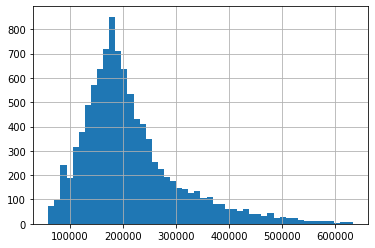

In [284]:
data_train.Price.hist(bins=50)
#целевая переменная распределена со смещением, но в целом более менее нормально

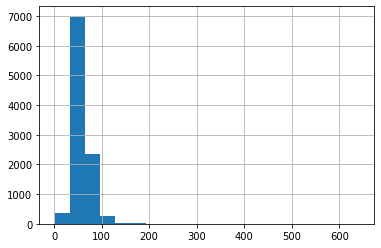

In [285]:
#обработка Square
data_train.Square.hist(bins=20)

In [286]:
data_train.Square.describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [287]:
data_train.Square.median()

52.51330992401352

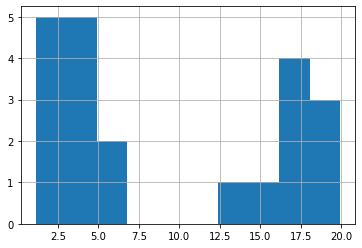

In [288]:
data_train.loc[data_train.Square < 20, 'Square'].hist()
#значения меньше 10 заменим на медианные

In [289]:
def square_min_correct(X):
  X.loc[data_train.Square < 10, 'Square'] = X.Square.median()

In [290]:
square_min_correct(data_train)
square_min_correct(data_test)

In [291]:
data_train.Square.describe()

count    10000.000000
mean        56.374350
std         20.979981
min         13.784865
25%         41.794392
50%         52.513580
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [292]:
#обработка нулевых значений Rooms
# (data_train.query('Rooms != 0').Square / data_train.query('Rooms != 0').Rooms).median()
(data_train.loc[data_train.Rooms != 0, 'Square'] / data_train.loc[data_train.Rooms != 0, 'Rooms']).median()

30.835861390438687

In [293]:
data_train.loc[data_train.Rooms == 0, 'Square']

1397    138.427694
1981    212.932361
2269     41.790881
3911     49.483501
4366     81.491446
4853     52.513310
6149     38.697117
8834     87.762616
Name: Square, dtype: float64

In [294]:
def rooms_null_correct(X):
  X.loc[X.Rooms == 0, 'Rooms'] = X.loc[X.Rooms == 0, 'Square'] / (X.loc[X.Rooms != 0, 'Square'] / X.loc[X.Rooms != 0, 'Rooms']).median()

In [295]:
rooms_null_correct(data_train)

In [296]:
rooms_null_correct(data_test)

In [297]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.892780,0.839842,1.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.374350,20.979981,13.784865,41.794392,52.513580,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [298]:
#обработка нулевых значений HouseFloor
def floor_null(X):

    house_floor_null = np.where(X.HouseFloor==0)[0]

    X.loc[house_floor_null,['HouseFloor']] = X.Floor.median()

In [299]:
#обработка LifeSquare
data_train.LifeSquare.describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

In [300]:
data_train.LifeSquare.isna().sum()

2113

In [301]:
data_train.LifeSquare.fillna(data_train.LifeSquare.median(),inplace=True)

In [302]:
data_train.LifeSquare.isna().sum()

0

In [303]:
data_test.LifeSquare.fillna(data_test.LifeSquare.median(),inplace=True)

In [304]:
data_test.LifeSquare.isna().sum()

0

In [305]:
#обработам аномальные значения
data_train.loc[data_train.LifeSquare > data_train.Square].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,131797.472284


In [306]:
data_train.LifeSquare.median() / data_train.Square.median()
#среднее отношение жилой площади к общей площади, используем его при замене аномальных значений

0.6242434827366207

In [307]:
def lifesquare_value_correct(X):
  X.loc[X.LifeSquare > X.Square, 'LifeSquare'] = X.loc[X.LifeSquare > X.Square, 'Square'] * (X.LifeSquare.median() / X.Square.median())
  X.loc[X.LifeSquare < X.Square.min(),'LifeSquare'] = X.Square.min() * (X.LifeSquare.median() / X.Square.median())

In [308]:
lifesquare_value_correct(data_train)
lifesquare_value_correct(data_test)

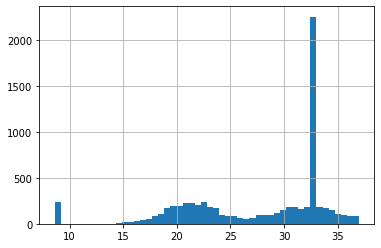

In [309]:
data_train.loc[data_train.LifeSquare < 37, 'LifeSquare'].hist(bins=50)

In [310]:
#обработка KitchenSquare
data_train.KitchenSquare.describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [311]:
data_train.loc[data_train.KitchenSquare > data_train.Square].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
5149,13703,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,B,B,21,5731,0,NaN,1,0,B,160488.033165
7088,6569,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,B,B,4,915,0,NaN,0,0,B,99079.960518
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


In [312]:
def kitchensquare_value_correct(X):
  X.loc[X.KitchenSquare > X.Square, 'KitchenSquare'] = X.loc[X.KitchenSquare > X.Square, 'Square'] - X.loc[X.KitchenSquare > X.Square, 'LifeSquare']
  

In [313]:
kitchensquare_value_correct(data_train)
kitchensquare_value_correct(data_test)

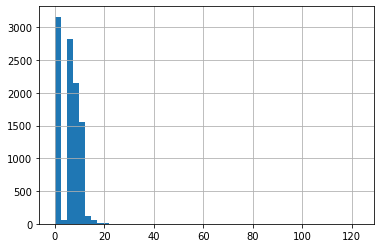

In [314]:
data_train.KitchenSquare.hist(bins=50)

In [315]:
#обработка HouseFloor
data_train.HouseFloor.describe()

count    10000.000000
mean        12.609400
std          6.775974
min          0.000000
25%          9.000000
50%         13.000000
75%         17.000000
max        117.000000
Name: HouseFloor, dtype: float64

In [316]:
def house_floor_null(X):

    house_floor_null = np.where(X.HouseFloor==0)[0]

    X.loc[house_floor_null,['HouseFloor']] = X.Floor.median()


In [317]:
house_floor_null(data_train)
house_floor_null(data_test)

In [318]:
data_train.loc[data_train.Floor > data_train.HouseFloor].head()
#судя по данным кажется, что ошибка скорее в признаке HouseFloor, поэтому замену я проведу в колонке HouseFloor

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,32.781260,0.0,14,7.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
14,10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,140647.565937
16,2119,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,0.051815,B,B,5,1227,0,NaN,0,0,B,117000.381287
21,11935,27,2.0,64.711835,32.781260,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
26,4378,27,3.0,106.958871,8.605112,0.0,17,7.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936


In [319]:
def house_floor_correct(X):
  X.loc[X.Floor > X.HouseFloor, 'HouseFloor'] = X.loc[X.Floor > X.HouseFloor, 'Floor'] + 1

In [320]:
house_floor_correct(data_test)
house_floor_correct(data_train)

In [321]:
data_train.loc[data_train.HouseFloor].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9.0,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993
9.0,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993
12.0,6452,13,2.0,54.522805,31.759753,1.0,8,12.0,1999,0.090799,B,B,74,19083,2,NaN,5,15,B,229220.372609
17.0,3000,34,2.0,57.969964,32.012483,9.0,6,14.0,2001,0.069753,B,B,53,13670,4,NaN,1,11,B,231828.437667
12.0,6452,13,2.0,54.522805,31.759753,1.0,8,12.0,1999,0.090799,B,B,74,19083,2,NaN,5,15,B,229220.372609


In [322]:
#обработка HouseYear
data_train.HouseYear.describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [323]:
#заменим выбросы на медиану
def house_year_correct(X):
  X.loc[X.HouseYear > 2021, 'HouseYear'] = X.HouseYear.median()

In [324]:
house_year_correct(data_train)
house_year_correct(data_test)

In [325]:
data_train.HouseYear.describe()

count    10000.000000
mean      1984.863800
std         18.409979
min       1910.000000
25%       1974.000000
50%       1977.000000
75%       2001.000000
max       2020.000000
Name: HouseYear, dtype: float64

In [326]:
#обработка категориальных переменных
data_train = pd.get_dummies(data_train)
data_test = pd.get_dummies(data_test)

In [327]:
#обработка HealhCare_1
data_train.Healthcare_1.isna().sum() / data_train.shape[0]
#поскольку пропущенных значений почти половина, а интерпретивровать эти данные трудно, я их удаляю из датасетов

0.4798

In [328]:
data_train.drop(columns='Healthcare_1', inplace=True)
data_test.drop(columns='Healthcare_1',inplace=True)

In [329]:
data_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,11,2748,1,0,0,0,1,0,1,0,1
1,15856,74,2.0,69.263183,32.925087,1.0,6,7.0,1977,0.075779,6,1437,3,0,2,0,1,0,1,0,1
2,5480,190,1.0,13.597819,8.459902,12.0,2,5.0,1909,0.000000,30,7538,87,5,5,0,1,0,1,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,23,4583,3,3,3,0,1,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,2,629,1,0,0,0,1,0,1,1,0


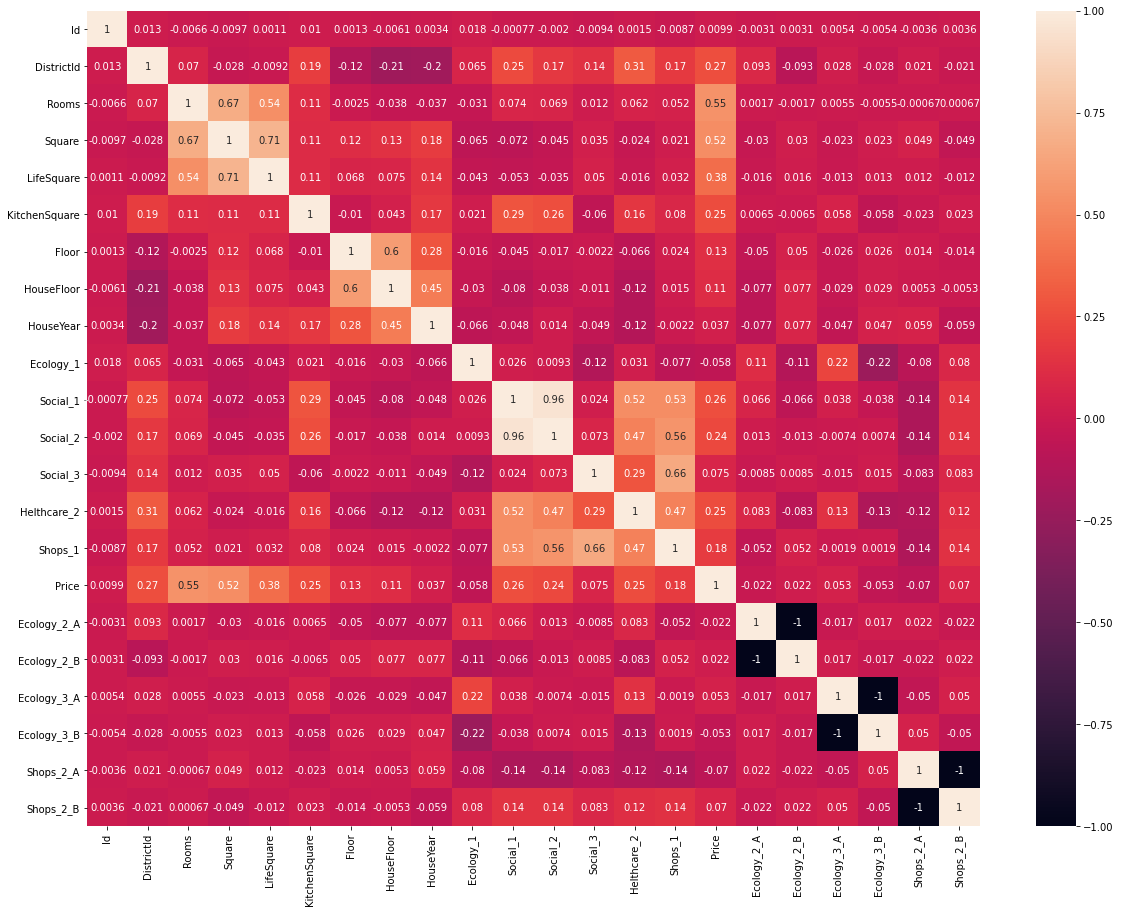

In [330]:
#изучим взаимодействие признаков грфически
fig, ax = plt.subplots(figsize=(20,15)) 
ax = sns.heatmap(data_train.corr(),annot=True)

In [331]:
#Видим, что наиболее значимый вклад вносят признаки DistrictID, Rooms, Square, LifeSquare, KitchenSquare, Social_1/2, Helrhcare_2

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


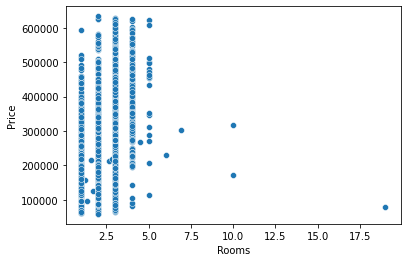

In [332]:
sns.scatterplot(data_train.Rooms, data_train.Price)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


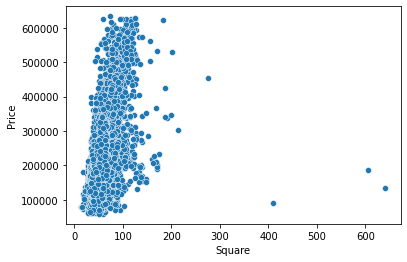

In [333]:
sns.scatterplot(data_train.Square, data_train.Price)

**Добавляем новые фичи**

In [334]:
#поскольку возможно важным для покупки не сколько количество комнат, но и их простор, добавим фичу
data_train['Rooms_space'] = data_train.LifeSquare / data_train.Rooms
data_test['Rooms_space'] = data_test.LifeSquare / data_test.Rooms

In [335]:
#поскольку почти все данные имеют смещение, прологарифмируем
feature_name = ['Rooms','Square','LifeSquare','Floor','HouseFloor','HouseYear']
feature_name_log = []
for i in feature_name:
    data_train[i +'_log'] = np.log(data_train[i])
    data_test[i+'_log'] = np.log(data_test[i])
    feature_name_log.append(i + '_log')

In [336]:
#для работы нам не нужен ID
data_train.drop(columns='Id',inplace=True)
data_test.drop(columns='Id', inplace=True)

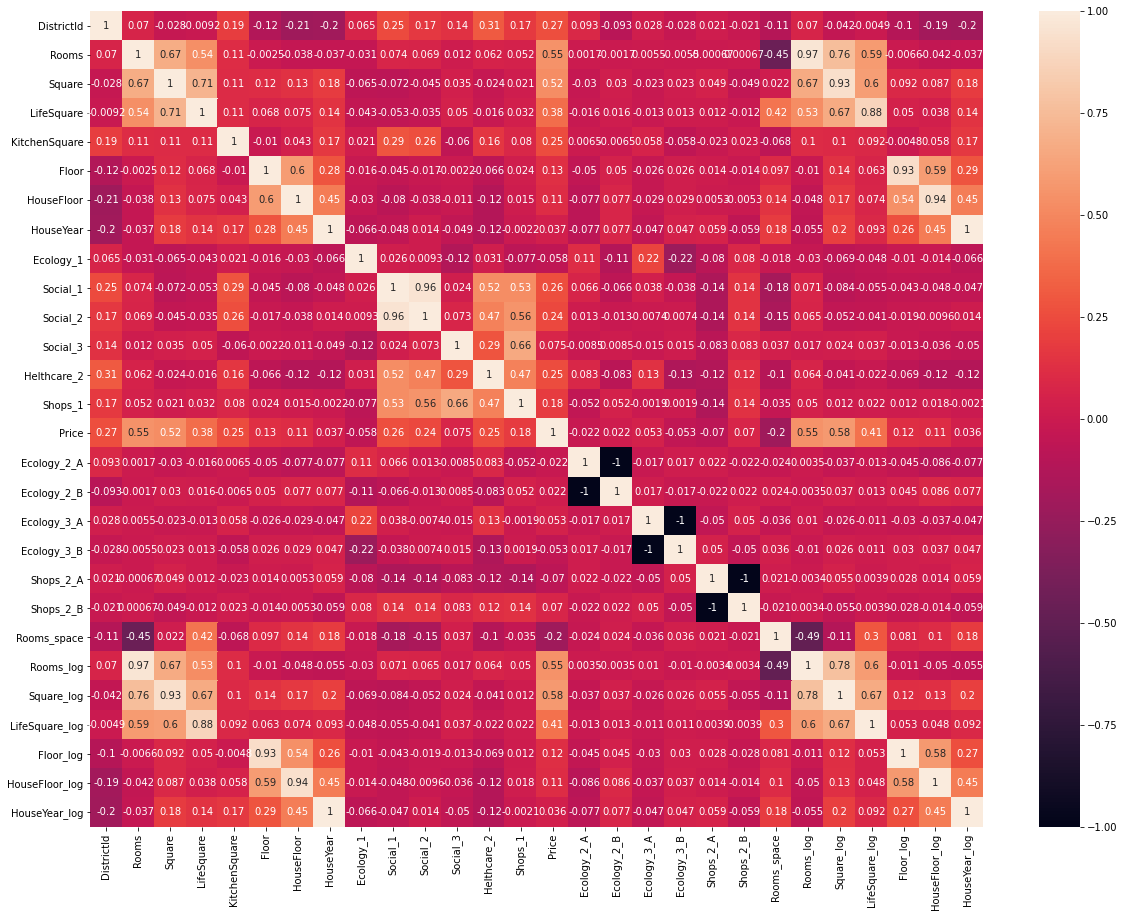

In [337]:
#изучим взаимодействие признаков графически
fig, ax = plt.subplots(figsize=(20,15)) 
ax = sns.heatmap(data_train.corr(),annot=True)

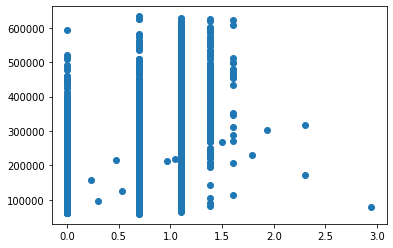

In [338]:
plt.scatter(data_train.Rooms_log, data_train.Price)

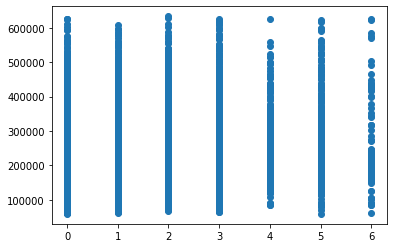

In [339]:
plt.scatter(data_train.Helthcare_2, data_train.Price)

**Тестируем модели**

In [340]:
#разделяем набор данных на учебный и валидный
y = data_train.Price
X = data_train.drop(columns='Price')

In [341]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [342]:
lm = LinearRegression()

In [343]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [344]:
def metrics(valid, model_predict):
  print(f'R2 = {r2_score(valid, model_predict.predict(X_valid))}')
  print(f'MAE = {mae(valid,model_predict.predict(X_valid))}')

In [345]:
metrics(y_valid, lm)

R2 = 0.5317581864582271
MAE = 44137.75916633159


In [346]:
#берём данные за основу

In [347]:
RFR = RandomForestRegressor(n_estimators=250,max_depth=10)

In [348]:
# params = {
#     'n_estimators' : [100,150,200],
#     'max_depth' : [3,5,8,10],
#     'max_features' : ('auto','sqrt', 'log2')  
# }

In [349]:
# RFR = GridSearchCV(RFR, params,cv=5)

In [350]:
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [351]:
metrics(y_valid,RFR)

R2 = 0.7020144058311046
MAE = 30151.437517467944


In [352]:
gbr = GradientBoostingRegressor(max_depth=5, n_estimators=150, random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [353]:
metrics(y_valid, gbr)

R2 = 0.7328902518485994
MAE = 28137.899756218278


In [354]:
CBR = cb.CatBoostRegressor(iterations=200,depth=8,l2_leaf_reg=0.5,learning_rate=0.1, loss_function='RMSE')

In [355]:
CBR.fit(X_train,y_train)

0:	learn: 87525.6349656	total: 13.2ms	remaining: 2.63s
1:	learn: 83043.6182521	total: 22.4ms	remaining: 2.21s
2:	learn: 78974.1025932	total: 31.5ms	remaining: 2.07s
3:	learn: 75458.0991008	total: 43.3ms	remaining: 2.12s
4:	learn: 72253.6174566	total: 53.2ms	remaining: 2.08s
5:	learn: 69206.5813861	total: 62.7ms	remaining: 2.03s
6:	learn: 66563.6907178	total: 72.4ms	remaining: 2s
7:	learn: 64397.0482664	total: 81.7ms	remaining: 1.96s
8:	learn: 62442.8442969	total: 91.4ms	remaining: 1.94s
9:	learn: 60654.7669266	total: 101ms	remaining: 1.92s
10:	learn: 59369.4214944	total: 110ms	remaining: 1.89s
11:	learn: 57779.3707968	total: 120ms	remaining: 1.87s
12:	learn: 56585.3931866	total: 129ms	remaining: 1.85s
13:	learn: 55505.5822271	total: 142ms	remaining: 1.89s
14:	learn: 54401.2755088	total: 151ms	remaining: 1.87s
15:	learn: 53408.0411962	total: 161ms	remaining: 1.85s
16:	learn: 52379.5650987	total: 170ms	remaining: 1.83s
17:	learn: 51515.4647480	total: 180ms	remaining: 1.82s
18:	learn: 507

In [356]:
metrics(y_valid, CBR)

R2 = 0.734539310966197
MAE = 27501.701954891236


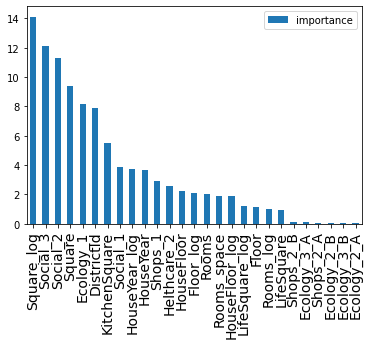

In [357]:
#на лучше моделе посмотрим ценность фичей 
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': CBR.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
feature_importances.reset_index(drop=True).plot(kind='bar')
plt.xticks(ticks=range(feature_importances.shape[0]), labels=feature_importances.feature,size=14);



In [358]:
feature_names_final = ['Square_log','Square','Social_2','Social_1','Social_3','DistrictId','Ecology_1','Rooms_log','Rooms', \
'KitchenSquare','HouseYear','Shops_1','Rooms_space','HouseYear_log','LifeSquare','Floor','LifeSquare_log', \
'HouseFloor','Floor_log','HouseFloor_log','Helthcare_2']

In [359]:
final_model = CBR.fit(X_train[feature_names_final], y_train)

0:	learn: 87243.1911034	total: 15.1ms	remaining: 3s
1:	learn: 82534.0653638	total: 26.6ms	remaining: 2.63s
2:	learn: 78473.2525829	total: 36ms	remaining: 2.36s
3:	learn: 74998.8746129	total: 45ms	remaining: 2.2s
4:	learn: 71713.1025314	total: 53.9ms	remaining: 2.1s
5:	learn: 68790.3917910	total: 62.7ms	remaining: 2.03s
6:	learn: 66490.5880217	total: 73.9ms	remaining: 2.04s
7:	learn: 64278.2275703	total: 83.7ms	remaining: 2.01s
8:	learn: 62216.9657651	total: 92.9ms	remaining: 1.97s
9:	learn: 60649.7614730	total: 102ms	remaining: 1.95s
10:	learn: 59087.2510388	total: 112ms	remaining: 1.92s
11:	learn: 57584.9017055	total: 120ms	remaining: 1.89s
12:	learn: 56313.7966250	total: 135ms	remaining: 1.94s
13:	learn: 55075.7957784	total: 143ms	remaining: 1.9s
14:	learn: 54012.5619214	total: 152ms	remaining: 1.88s
15:	learn: 53176.0685613	total: 161ms	remaining: 1.85s
16:	learn: 52388.5507305	total: 169ms	remaining: 1.82s
17:	learn: 51454.4382893	total: 178ms	remaining: 1.8s
18:	learn: 50757.78116

In [360]:
metrics(y_valid,final_model)

R2 = 0.7413031818552722
MAE = 27593.940089090036


In [361]:
#Создаём и сохраняем предсказание для тестовых данных.

In [362]:
files.upload()

Saving sample_submission.csv to sample_submission (1).csv


{'sample_submission.csv': b'Id,Price\r\n725,200000.0\r\n15856,200000.0\r\n5480,200000.0\r\n15664,200000.0\r\n14275,200000.0\r\n7633,200000.0\r\n13329,200000.0\r\n5502,200000.0\r\n4220,200000.0\r\n11538,200000.0\r\n15975,200000.0\r\n3310,200000.0\r\n9286,200000.0\r\n11260,200000.0\r\n5214,200000.0\r\n11307,200000.0\r\n13543,200000.0\r\n615,200000.0\r\n3495,200000.0\r\n2321,200000.0\r\n12046,200000.0\r\n16688,200000.0\r\n12694,200000.0\r\n783,200000.0\r\n8968,200000.0\r\n13454,200000.0\r\n12190,200000.0\r\n11160,200000.0\r\n10291,200000.0\r\n891,200000.0\r\n2982,200000.0\r\n3818,200000.0\r\n2449,200000.0\r\n8317,200000.0\r\n4922,200000.0\r\n1257,200000.0\r\n9348,200000.0\r\n4176,200000.0\r\n10704,200000.0\r\n6624,200000.0\r\n5428,200000.0\r\n12749,200000.0\r\n8994,200000.0\r\n11513,200000.0\r\n3047,200000.0\r\n9519,200000.0\r\n12309,200000.0\r\n14081,200000.0\r\n8334,200000.0\r\n6343,200000.0\r\n14788,200000.0\r\n15748,200000.0\r\n153,200000.0\r\n14149,200000.0\r\n269,200000.0\r\n5452,20

In [363]:
y_test_preds = final_model.predict(data_test[feature_names_final])

submission_df = pd.read_csv("sample_submission.csv")
submission_df['Price'] = y_test_preds
submission_df.to_csv('VSmirnov_predictions.csv', index=False, encoding='utf-8', sep=',')

In [364]:
files.download('VSmirnov_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>